In [193]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These) Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("data/clinicaltrial_data.csv")


# Combine the data into a single dataset
pymaceuticals_data_df = pd.merge( clinical_trial_data_to_load,mouse_drug_data_to_load, on = ('Mouse ID'))

# Display the data table for preview
pymaceuticals_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [315]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume_df = pymaceuticals_data_df.groupby(['Drug', 'Timepoint'], as_index=False)
# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume_df["Tumor Volume (mm3)"].mean())
# Preview DataFrame
mean_tumor_volume_df.head(12)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [195]:
#Tumor Response to Treatment

In [196]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_tumor_volume_df = pymaceuticals_data_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
SE_tumor_volume_df = pd.DataFrame(SE_tumor_volume_df["Tumor Volume (mm3)"].sem().reset_index())
# Preview DataFrame
SE_tumor_volume_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [197]:
# Minor Data Munging to Re-Format the Data Frames
drugs_df =mean_tumor_volume_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
# Preview that Reformatting worked
drugs_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


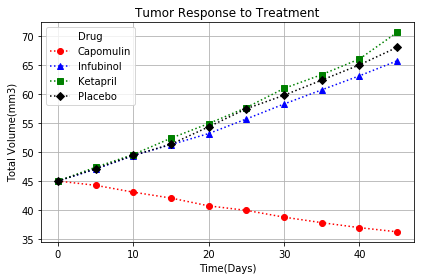

In [346]:
# Generate the Plot (with Error Bars)
drugs_plot_df = drugs_df[['Capomulin','Infubinol', 'Ketapril', 'Placebo']].copy()
styles = ['ro:','b^:','gs:','kD:']
fig1 = drugs_plot_df.plot(kind='line', title='Tumor Response to Treatment', grid='On', legend=True, style=styles)
fig1.set_xlabel('Time(Days)')
fig1.set_ylabel('Total Volume(mm3)')
plt.tight_layout()
# Save the Figure
fig1 = fig1.get_figure()
fig1.savefig("tumor_response.png")
# Show the Figure
plt.show()



In [317]:
#Metastatic Response to Treatment

In [318]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites_df = pymaceuticals_data_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
mean_met_sites_df = pd.DataFrame(mean_met_sites_df["Metastatic Sites"].mean())
# Preview DataFrame
mean_met_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [319]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met_sites_df = pymaceuticals_data_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
SE_met_sites_df = pd.DataFrame(SE_met_sites_df["Metastatic Sites"].sem())
# Preview DataFrame
SE_met_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [320]:
# Minor Data Munging to Re-Format the Data Frames
drugs_met_df =mean_met_sites_df.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')
# Preview that Reformatting worked
drugs_met_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


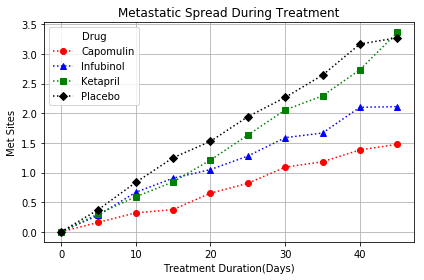

In [347]:
# Generate the Plot (with Error Bars)
drugs_met_plot_df = drugs_met_df[['Capomulin','Infubinol', 'Ketapril', 'Placebo']].copy()
styles = ['ro:','b^:','gs:','kD:']
#labels = ['Capomulin','Ceftamin', 'Ketapril', 'Infubinol']
fig2 = drugs_met_plot_df.plot(kind='line', title='Metastatic Spread During Treatment', grid='On', legend=True, style=styles)
fig2.set_xlabel('Treatment Duration(Days)')
fig2.set_ylabel('Met Sites')
plt.tight_layout()
# Save the Figure
fig2 = fig2.get_figure()
fig2.savefig("metastatic_spread.png")
# Show the Figure
plt.show()

In [322]:
#Survival Rates

In [323]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_df = pymaceuticals_data_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count_df["Mouse ID"].count().reset_index())
mouse_count_df.rename(columns={'Mouse ID':'Mouse Count'}, inplace = True)
# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [324]:
# Minor Data Munging to Re-Format the Data Frames
drugs_mouse_count_df = mouse_count_df.pivot_table('Mouse Count', ['Timepoint'], 'Drug')
# Preview the Data Frame
drugs_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [325]:
drugs_mouse_count_df["Capomulin_percent"]=drugs_mouse_count_df["Capomulin"]/drugs_mouse_count_df["Capomulin"].iloc[0] * 100
drugs_mouse_count_df["Infubinol_percent"]=drugs_mouse_count_df["Infubinol"]/drugs_mouse_count_df["Infubinol"].iloc[0] * 100
drugs_mouse_count_df["Ketapril_percent"]=drugs_mouse_count_df["Ketapril"]/drugs_mouse_count_df["Ketapril"].iloc[0] * 100
drugs_mouse_count_df["Placebo_percent"]=drugs_mouse_count_df["Placebo"]/drugs_mouse_count_df["Placebo"].iloc[0] * 100
drugs_mouse_count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
Timepoint,,,,,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25,100.0,100.0,100.0,100.0
5,25,21,25,23,23,24,25,25,25,24,100.0,100.0,92.0,96.0
10,25,20,21,22,21,24,23,24,23,22,100.0,84.0,88.0,96.0
15,24,19,21,19,21,20,17,24,23,21,96.0,84.0,76.0,80.0
20,23,18,20,19,20,19,17,23,21,17,92.0,80.0,76.0,76.0
25,22,18,18,19,18,17,14,23,19,16,88.0,72.0,76.0,68.0
30,22,16,17,18,15,15,13,23,18,15,88.0,68.0,72.0,60.0
35,22,14,12,17,15,14,10,21,16,14,88.0,48.0,68.0,56.0
40,21,14,10,15,15,12,9,20,12,14,84.0,40.0,60.0,48.0


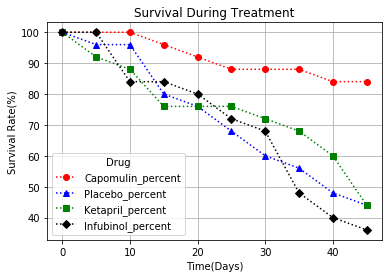

<Figure size 432x288 with 0 Axes>

In [326]:
# Generate the Plot  (Accounting for percentages)
drugs_mouse_plot_df = drugs_mouse_count_df[['Capomulin_percent','Placebo_percent', 'Ketapril_percent', 'Infubinol_percent']].copy()
styles = ['ro:','b^:','gs:','kD:']
fig3 = drugs_mouse_plot_df.plot(kind='line', title='Survival During Treatment', grid='On', legend=True, style=styles)
fig3.set_xlabel('Time(Days)')
fig3.set_ylabel('Survival Rate(%)')

# Save the Figure
fig3 = fig3.get_figure()
fig3.savefig("survival_rate.png")
# Show the Figure
plt.show()
plt.tight_layout()

In [327]:
## Summary Bar Graph

In [328]:
# Calculate the percent changes for each drug
#used pct_change with parameter periods = 9 because we need percentage change between open and close value.
per_change_df = drugs_df.pct_change(periods=9).dropna(how='any')
#pivot table with only required data(don't need Timepoint) and transposing
per_change_df = pd.pivot_table(per_change_df, index= 'Drug').T
per_change_df['Drug'] = per_change_df['Drug'] * 100
per_change_df.rename(columns={'Drug': ''})


,
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


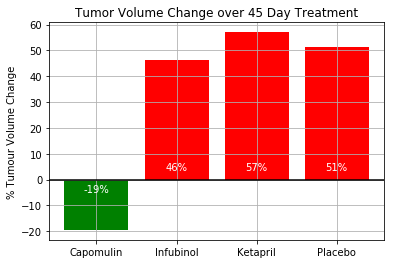

In [345]:
# Store all Relevant Percent Changes into a Tuple
#per_change_df = per_change_df[['Capomulin','Infubinol', 'Ketapril', 'Placebo']]
per_change_tuple = ([per_change_df.iloc[0].name, float(per_change_df.iloc[0].values[0])],
                   [per_change_df.iloc[2].name, float(per_change_df.iloc[2].values[0])],
                   [per_change_df.iloc[3].name, float(per_change_df.iloc[3].values[0])],
                   [per_change_df.iloc[5].name, float(per_change_df.iloc[5].values[0])])
# Splice the data between passing and failing drugs
Fail = ()
Pass = ()
for key, value in per_change_tuple:
    if value >= 0:
        Fail = Fail + (key, value) 
    else: 
        Pass = Pass + (key, value)
        
# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Volume Change over 45 Day Treatment')
plt.ylabel('% Tumour Volume Change')
xlabels = ['Capomulin','Infubinol', 'Ketapril', 'Placebo']
plt.xticks(np.arange(len(xlabels)), xlabels)
plt.axhline(color = 'black')

# Use functions to label the percentages of changes

def setLabel(count, value):
    if value < 0:
        y_coor = -5
    else:
        y_coor = 3.5
    plt.text(count, y_coor, str(int(value)) + '%', ha = 'center', color = 'white')

# Call functions to implement the function calls
for index in range(0,len(per_change_tuple)):
    setLabel(index,per_change_tuple[index][1])

data = [per_change_tuple[index][1] for index in range(0,len(per_change_tuple))]
plt.grid()
plt.bar(np.arange(len(xlabels)), 
        data, align='center',
        color = ['red' if data[r] > 0 else 'green' for r in np.arange(len(xlabels))]
       )

#print(fig1)
# Save the Figure
#fig1 = fig1.get_figure()
plt.savefig("tumor_change.png")
# Show the Figure
#plt.show()
